# Step 1: Import necessary libraries 

In [783]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Warnings suppression
import warnings
warnings.filterwarnings('ignore')

# Step 2: Exploratory Data Analysis

## 2.1 Reading & Understanding the data    

### Basic quality inspection

In [784]:
bike = pd.read_csv("day.csv", parse_dates=['dteday'])

In [785]:
# Checking the top 5 rows of the dataframe
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [786]:
# Checking the last 5 rows of the dataframe
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,2019-12-27,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,2019-12-31,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [787]:
#Checking the shape of the dataframe 
bike.shape

(730, 16)

In [788]:
# Checking the size of the dataframe
bike.size

11680

In [789]:
# How many types of each data type column exists and total memory usage
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

Observation 1: We see that there are 730 rows and all the attributes have 730 non-null values and hence there are visibily no null values but still we need to inspect further to confirm this.

In [790]:
#Checking the numerical columns data distribution statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Checking for Null or missing values

In [791]:
# percentage of null values in each column

round(100*(bike.isnull().sum()/len(bike.index)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [792]:
# checking row-wise null count percentage

round((bike.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [793]:
## Duplicate Check
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [794]:
bike_dup.shape

(730, 16)

In [795]:
bike.shape

(730, 16)

Observation 2: We can confirm that there are no null values in any rows or columns. There are no duplicates as the shape of the dataframe after dropping duplicates is same as that of before dropping duplicates.

## 2.2 Data Cleaning

In [796]:
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2018-06-01,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2018-07-01,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2018-08-01,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2018-09-01,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2018-10-01,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


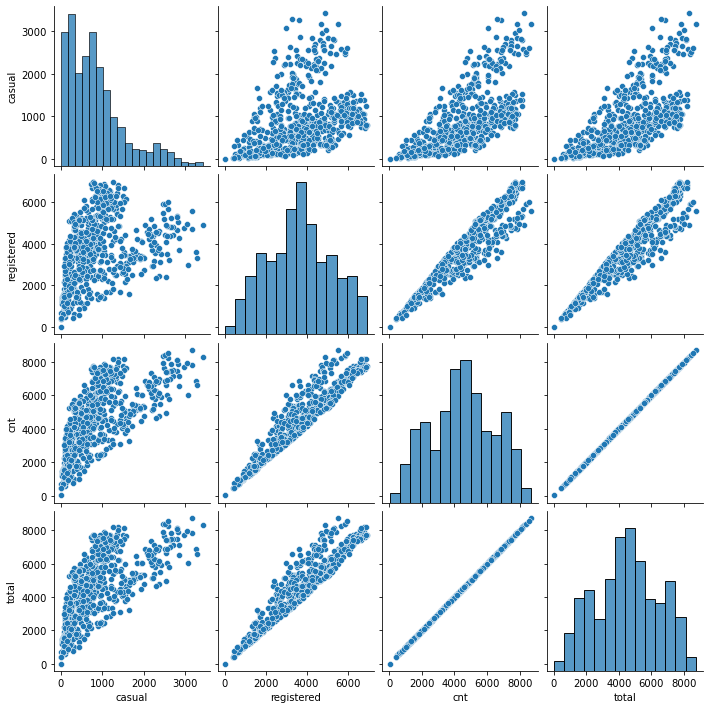

In [797]:
# Checking the relationship between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show()

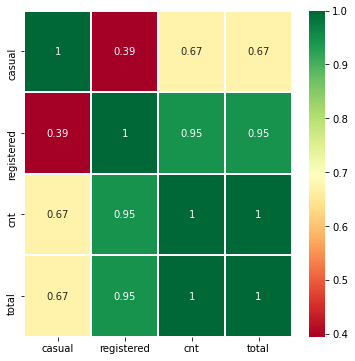

In [798]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

Observation 3:

1. 'instant' is just a running number which is a unique identifier for each entry
2. 'dteday' indicates the date which has already been split into 3 separate columns
3. 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable as per the problem statement.

### Removing unwanted columns

In [799]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

In [800]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## 2.3 Encoding  

### Encoding Categorical variables

1. Converting season, mnth,weathersit and weekday to categorical columns
2. Converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter 
3. mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec 
4. weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
5. weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat 
    

In [801]:
#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [802]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

Jul    0.084932
Aug    0.084932
Dec    0.084932
May    0.084932
Jan    0.084932
Mar    0.084932
Oct    0.084932
Apr    0.082192
Sep    0.082192
Nov    0.082192
Jun    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [803]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [804]:
#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Tuesday      0.143836
Monday       0.143836
Saturday     0.142466
Sunday       0.142466
Wednesday    0.142466
Thursday     0.142466
Friday       0.142466
Name: weekday, dtype: float64

## 2.4 Handling Outliers

In [805]:
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,W1_Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,W1_Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,W1_Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,W1_Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,W1_Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,W1_Spring,0,Jan,0,Saturday,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,W1_Spring,0,Jan,0,Sunday,0,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,W1_Spring,0,Jan,0,Monday,1,Misty,6.765000,8.11270,53.5833,17.875868,959
8,W1_Spring,0,Jan,0,Tuesday,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,W1_Spring,0,Jan,0,Wednesday,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [806]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

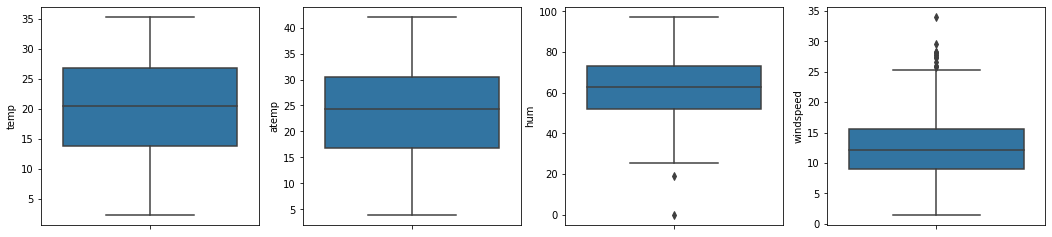

In [807]:
## Plotting box plot for continous variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

Observation 4: Except for few outliers in 'windspeed' and very few in 'hum', we don't have outliers to handle.

## 2.5 Data Visualization

In [808]:
## function to draw bar plot for various categorical variables

def var_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return       

### Season

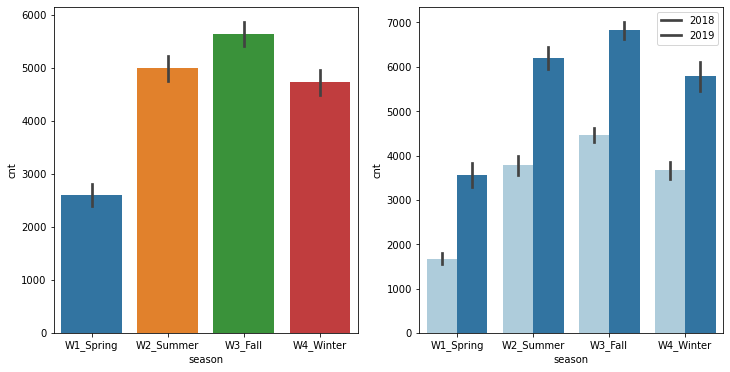

In [809]:
categorical_plot('season',12,6)

Observation 5: The bike rental count was high during the fall season , with a good increase during the fall of 2019 compared to the previous year. Followed by summer, winter and spring in total.

### Month

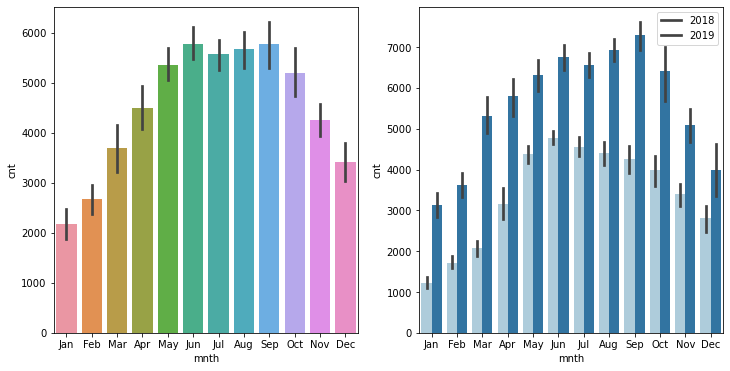

In [810]:
categorical_plot('mnth',12,6)

Observation 6: The months June to September has the highest number of bike rentals compared to other months and hence this duration is to be monitored. Also the least being January followed by February.

### Weather

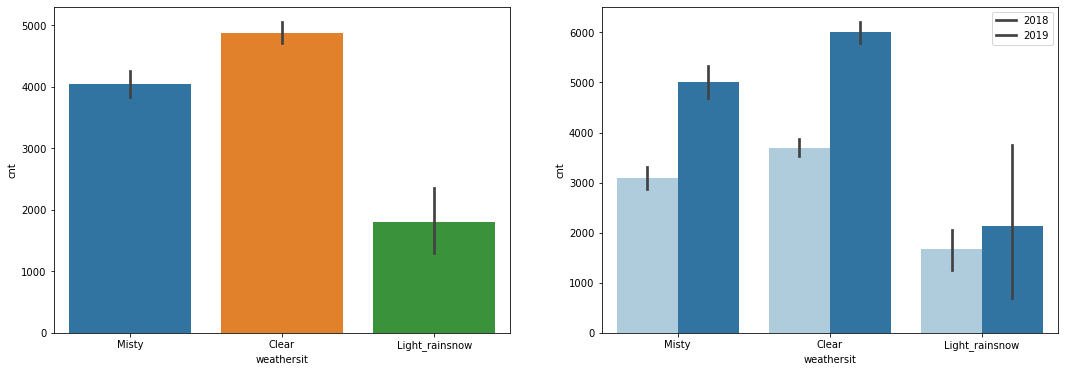

In [811]:
categorical_plot('weathersit',18,6)

Observation 7: It is clear that when the weather is good or clear, the bike rental count is the highest followed by misty. Hence the weather condition is a good predictor to be noted.

### Weekday

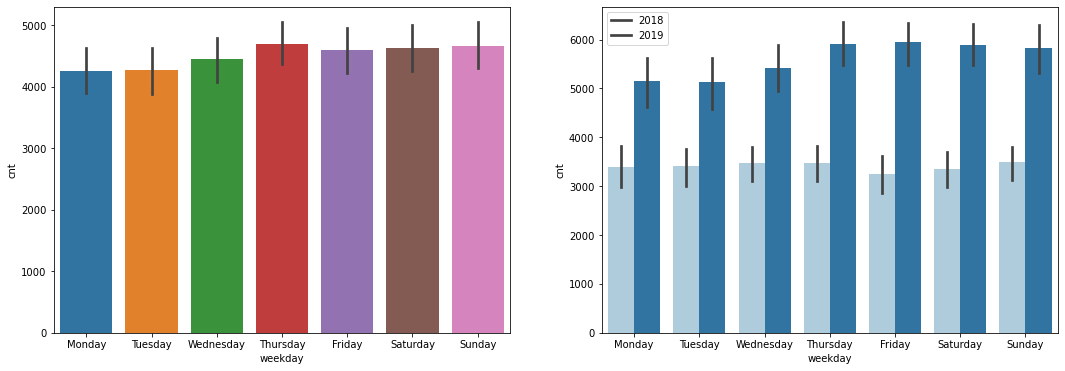

In [812]:
categorical_plot('weekday',18,6)

Observation 8: We see that the bike rentals on Thursday is the highest almost the same towards the weekend, but with this we can't conclude whether this could be good predictor or not as there is no drastic fall or hike in the number for any day. Hence, we need further analysis.

### Holiday

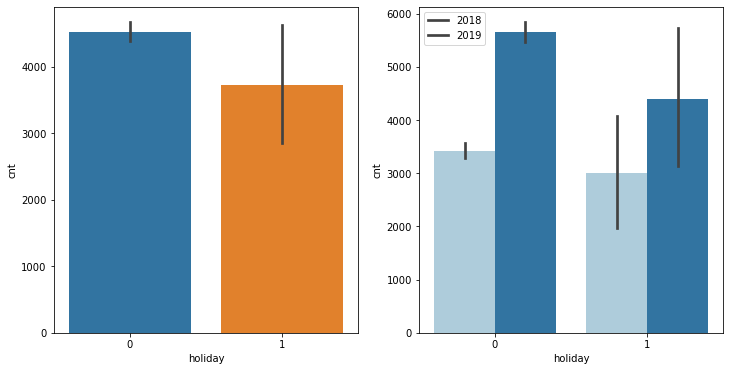

In [813]:
categorical_plot('holiday',12,6)

Observation 9: The number of bikes rented during a non-holiday is more compared to that of a holiday. 

### Working day

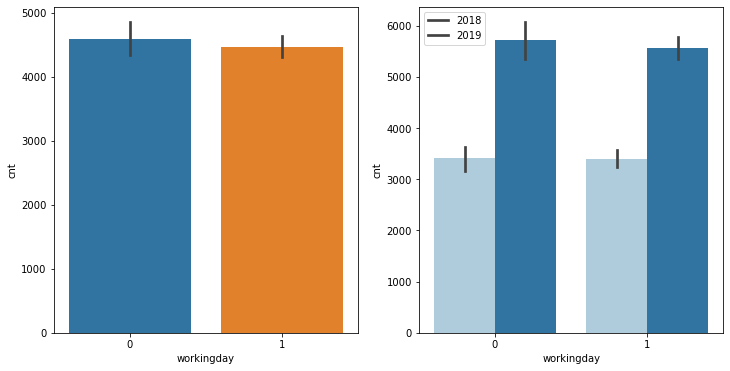

In [814]:
categorical_plot('workingday',12,6)

Observation 10: Supporting the previous observation, the number of bike rental is more during a working day compared to a holiday. But we need to validate it's significance in model building.

### Year

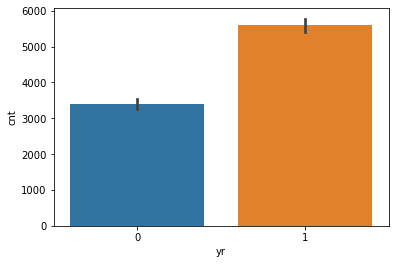

In [815]:
sns.barplot('yr','cnt',data=bike)
plt.show()

Observation 11: From the previous observations and from the above graph we can say that, with reference to all the other variables, the number of bike rentals is higher in 2019 than in 2018.

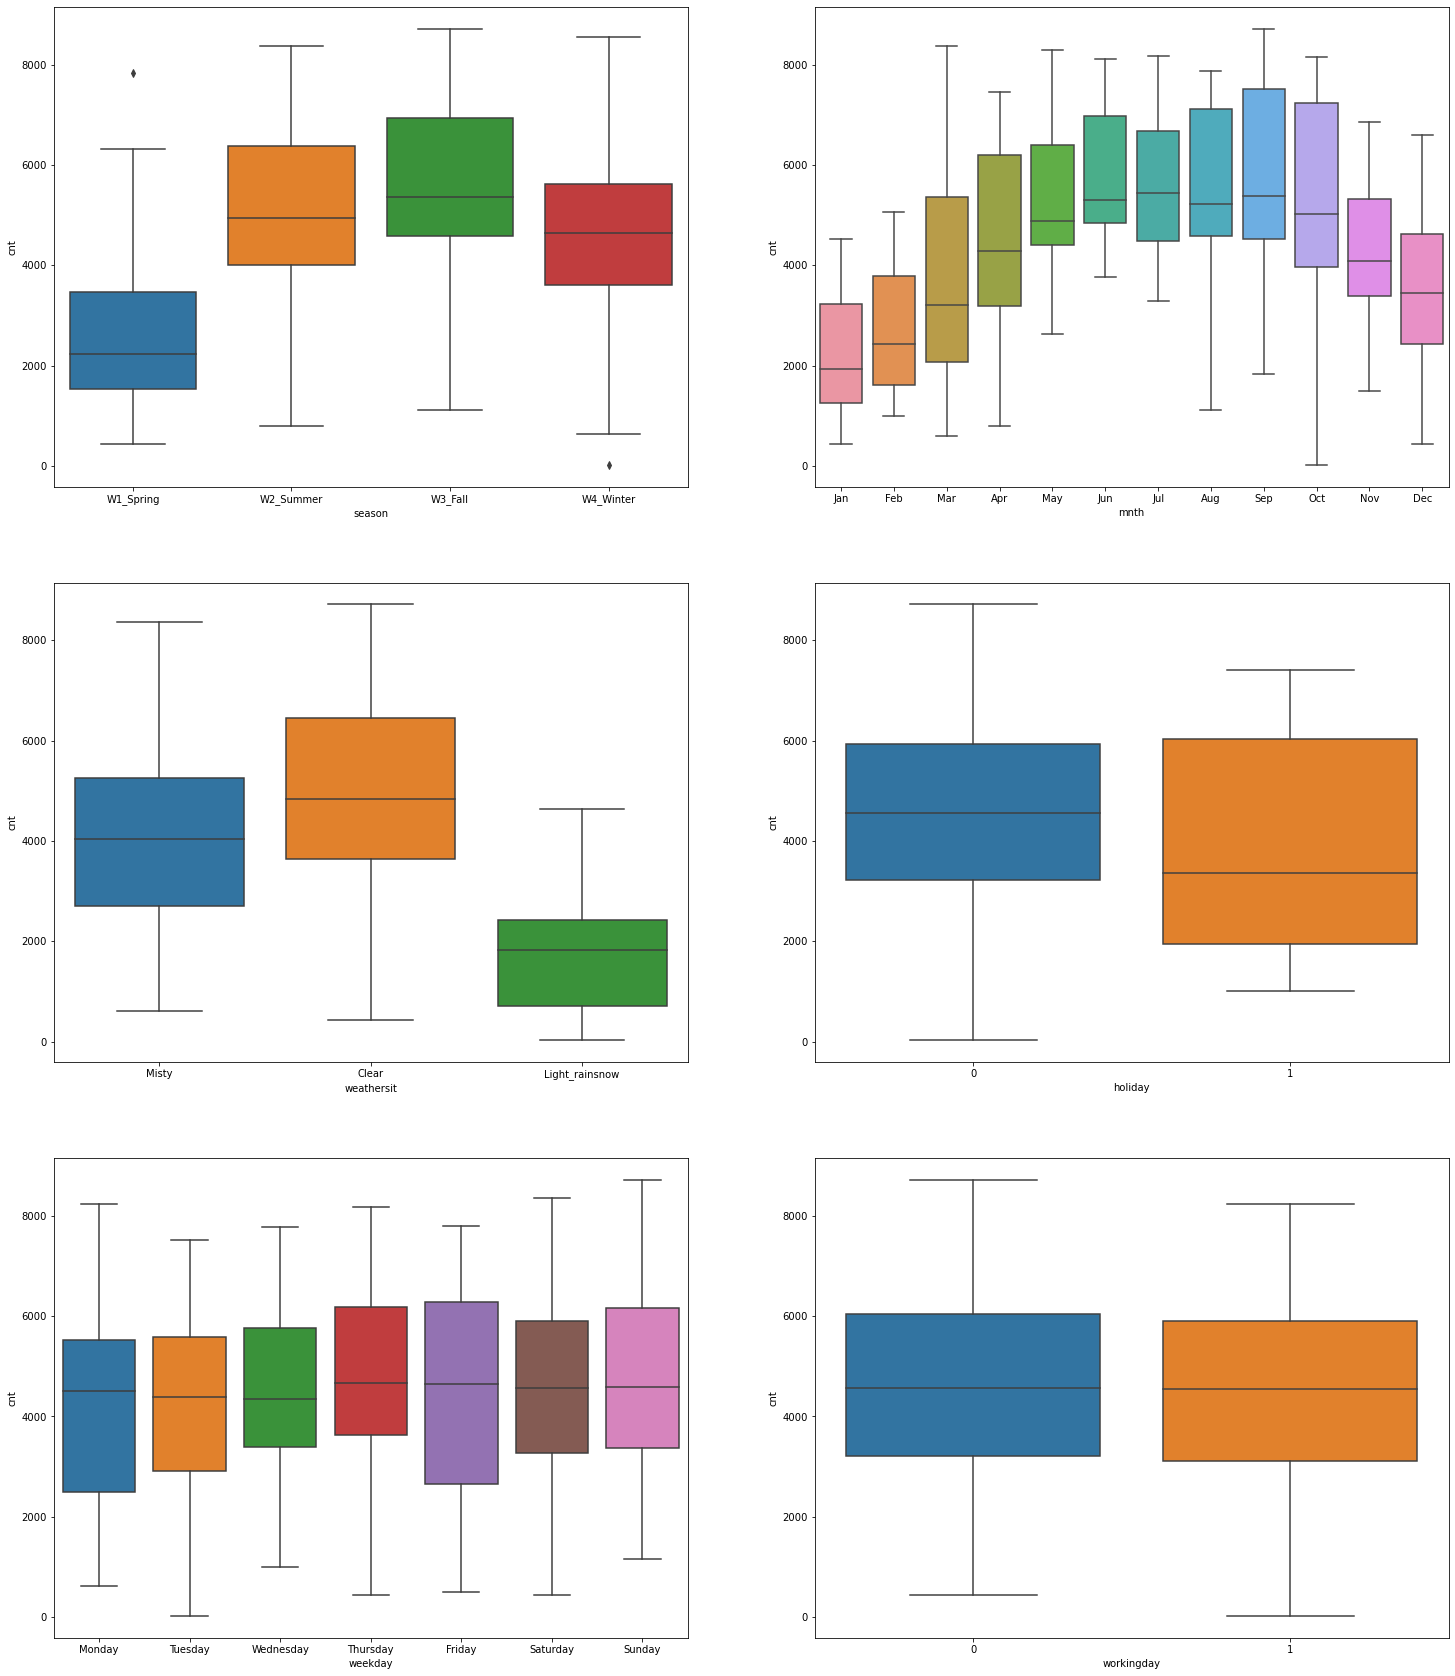

In [816]:
## Plotting the box plot of the categorical variables with the target variable

plt.figure(figsize=(25,30))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

Observation 12:

1. Seasons: Fall season has the highest bike rental with median around 5000 followed by summer season.
    
2. Month: September month has highest number of bike rentals followed by October and August, hence we need to check if this could be a good predictor or not
    
3. Weather: The highest bike rentals are when the weather is good or clear with median around 4500-5000.
    
4. Holiday: Non- holiday has higher bike rentals but doesn't have a considerable difference with that of the holiday rental count and hence we need to check its significance in model building
    
5. Weekday: Same with the weekday as that of holiday, not much of a difference in the median and shows a close trend for each day hence we need to check its significance as well.
    
6. Workingday: Even this attribute doesn't indicate any unique trend while looking at the box plot and hence we need to inspect its significance.

### Numerical Variable Analysis

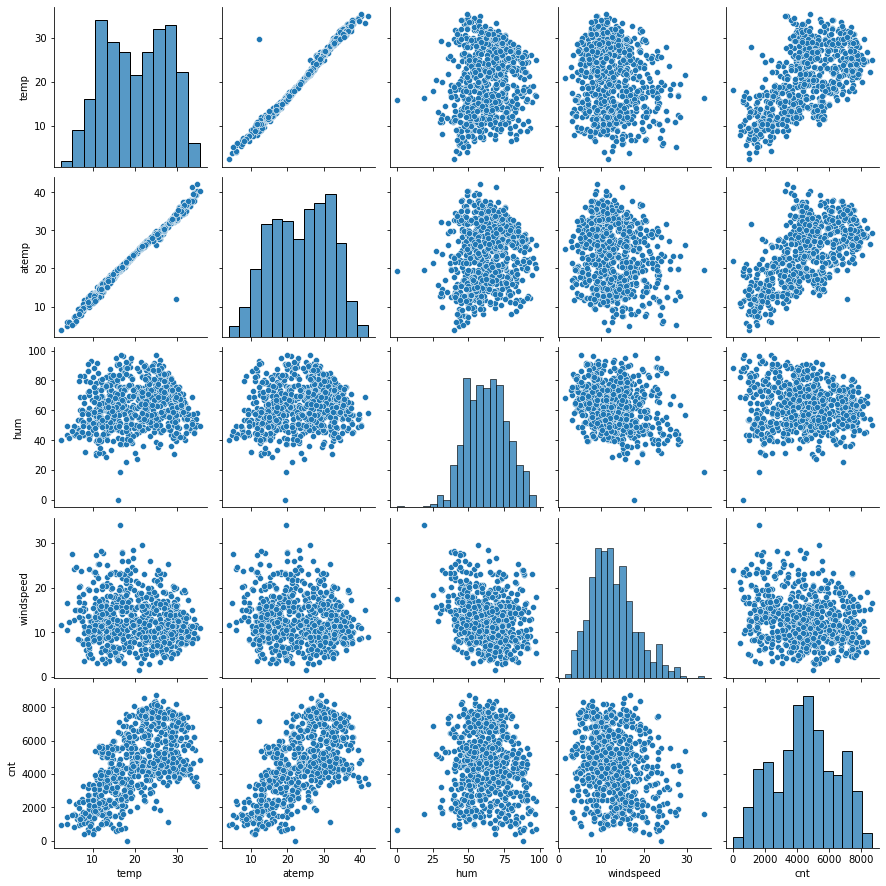

In [817]:
#Generating pairplot to check the relationships between numeric variables variables
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

Observation 13: There is a linear relationship between temp and atemp. Also, there is a decent linear realtionship between temp, atemp and cnt.

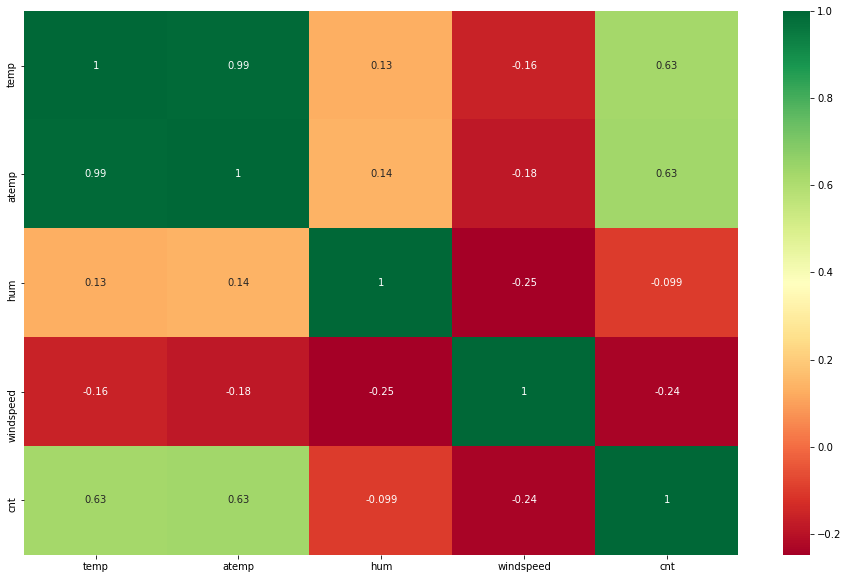

In [818]:
## Plotting a heatmap with the continous variables

plt.figure(figsize = (16, 10))
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='RdYlGn', annot = True)
plt.show()

Observation 14: There is a high positive correlation between temp and atemp. Also complimenting the pair plot, the temp and atemp has a correlation of 0.63 with the attribute cnt.

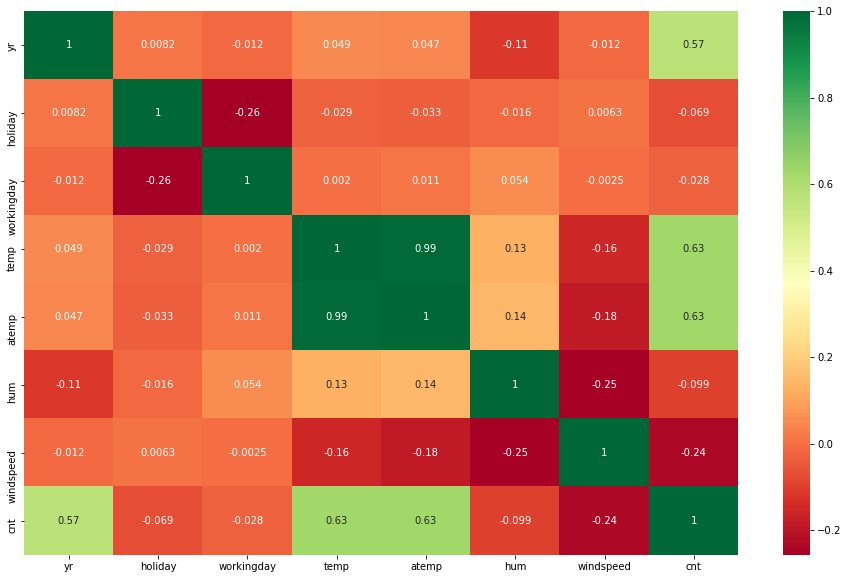

In [819]:
## Plotting the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="RdYlGn")
plt.show()

Observation 15:
1. With respect to count, we can also see that, windspeed is negatively correlated to count and year is positively correlated to count.
2. We see negative correlation between workingday and hoilday for obvious reasons.
3. There is also a negative correlation of -0.25 between humidity and windspeed.

# Step 3: Data Preparation      

## 3.1 Dummy Variable Creation

### Season

In [820]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0


### Weather

In [821]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


### Month

In [822]:
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


### Weekday

In [823]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1


## 3.2 Merging the dataframes

In [824]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,1,0,0,0,0,0
1,W1_Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,0,0,1,0
2,W1_Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1


In [825]:
bike_new.shape

(730, 34)

In [826]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    uint8  
 13  W3_Fall         730 non-null    uint8  
 14  W4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

## 3.3 Removing unwanted columns

In [827]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [828]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   W2_Summer       730 non-null    uint8  
 9   W3_Fall         730 non-null    uint8  
 10  W4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

# Step 4: Model Building

## 4.1 Splitting the data into Train & Test Dataset

### Train & Test Split

In [829]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

In [830]:
bike_train.shape

(510, 30)

In [831]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,20.218078,23.590696,62.340743,12.771365,4494.103922,0.245098,0.262745,...,0.084314,0.082353,0.025490,0.343137,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462867,7.500110,8.138271,14.418728,5.205888,1948.315655,0.430568,0.440557,...,0.278131,0.275172,0.157763,0.475223,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [832]:
bike_test.shape

(220, 30)

In [833]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,20.553817,24.040727,63.749086,12.745665,4540.236364,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,7.533926,8.188064,13.790510,5.184271,1911.199159,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4.2 Rescaling the features

In [834]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [835]:
#Dataframe before scaling 
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.5698,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,0,1,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,14.862500,18.4969,83.8750,6.749714,3786,0,0,...,0,0,0,1,1,0,0,0,0,0


In [836]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [837]:
#Checking after rescalling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,1,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,0,0,0,0,0,1
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,1,0,0,0,0,0


In [838]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,0.540777,0.515530,0.647696,0.346806,0.514508,0.245098,0.262745,...,0.084314,0.082353,0.025490,0.343137,0.141176,0.143137,0.145098,0.139216,0.152941,0.131373
std,0.500487,0.151726,0.462867,0.227939,0.213652,0.149805,0.160182,0.224150,0.430568,0.440557,...,0.278131,0.275172,0.157763,0.475223,0.348545,0.350557,0.352545,0.346511,0.360284,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation 16: After MinMax scaling we can see that all the variables have been scaled accordingly.

## 4.3 Checking Correlation Coefficient

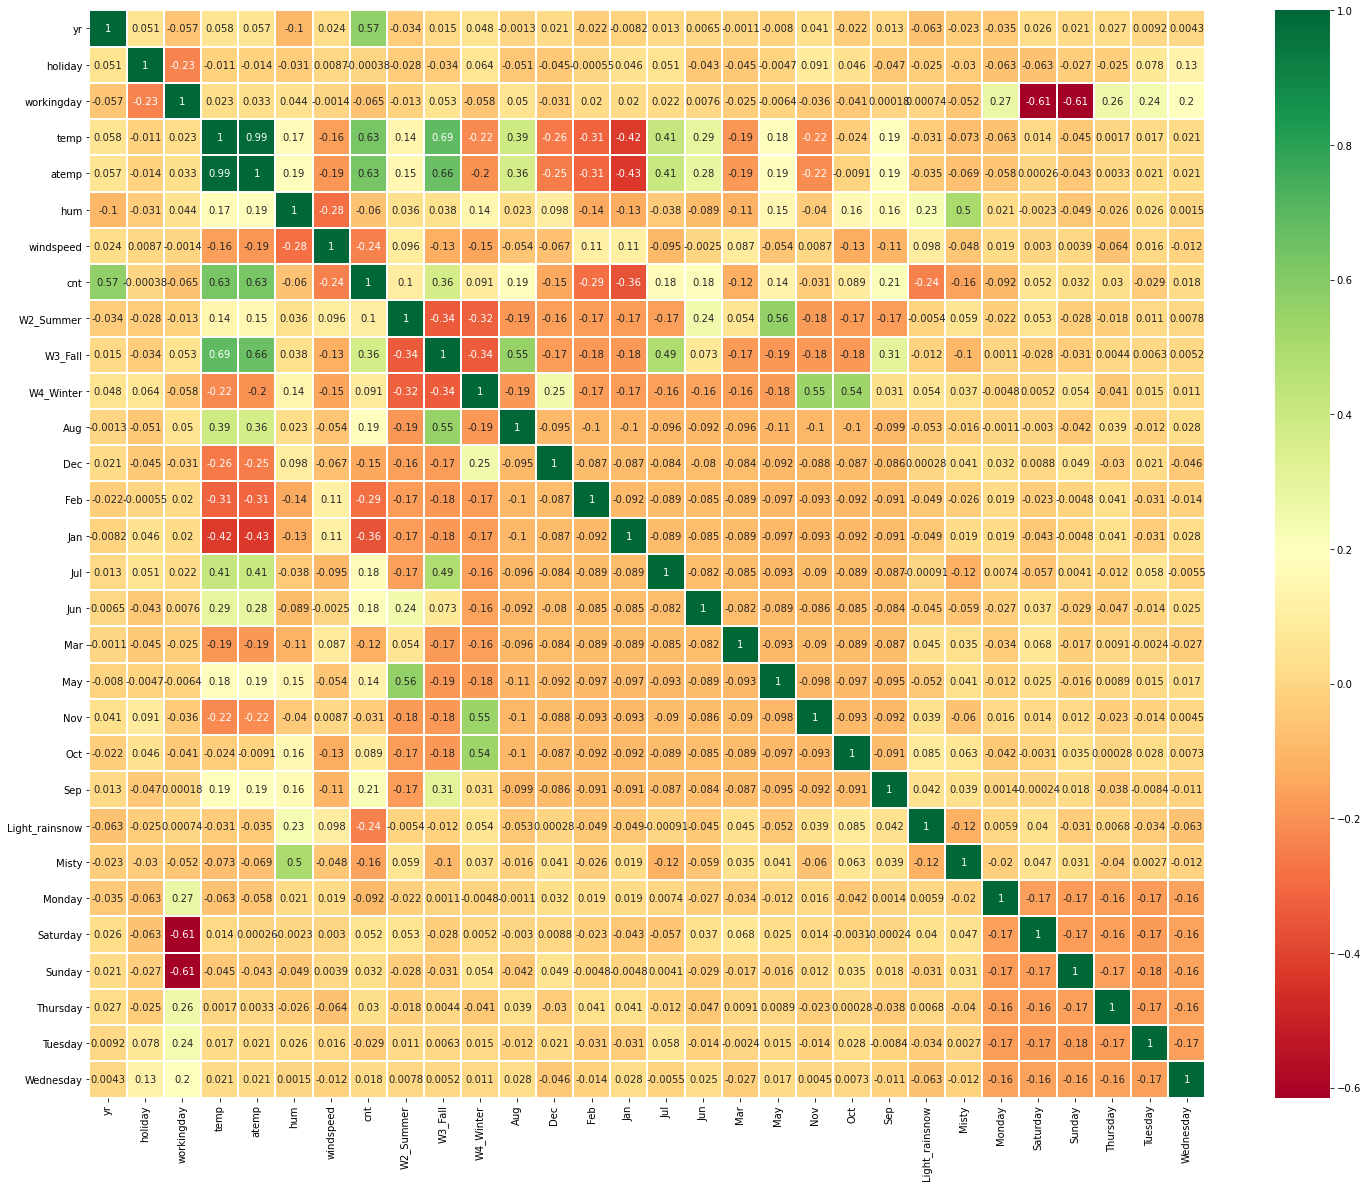

In [839]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

Observation 17: Some of the main correlations that can be observed from the heatmap are:

1. cnt is positively correlated to yr,temp and atemp as observed before
2. temp and atemp has a high correlateion of 0.99
3. workingday has a correlation of -0.61 with Saturday and Sunday
4. humidity and windspeed has a correlation of -0.28
5. humidity and misty weather is having a correlation of 0.5
6. W4_winter has a correlation of 0.55 and 0.54 with Nov and oct respectively.

Likewise, we can identify that there exists Multi-Collinearity among multiple variables and hence we need to try to minimize this as much as possible.

## 4.4 Dividing into X_train and y_train

In [840]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## 4.5 Recursive feature elimination

In [841]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [842]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', False, 5),
 ('Jun', False, 14),
 ('Mar', False, 8),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 12)]

In [843]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Nov', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday', 'Sunday'],
      dtype='object')

In [844]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Oct', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [845]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

## 4.6 Manual Model Development using statsmodel 

In [846]:
# Function for VIF Calculation

def cal_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [847]:
#Selected columns for Model 1 - all columns selected by RFE
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())
cal_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          6.23e-182
Time:                        18:13:23   Log-Likelihood:                 498.36
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     494   BIC:                            -897.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1914      0.040      4.

,Features,VIF
2,temp,389.55
3,atemp,368.26
4,hum,26.80
1,workingday,17.07
7,W3_Fall,6.98
5,windspeed,5.87
13,Saturday,4.23
14,Sunday,4.20
6,W2_Summer,3.45
8,W4_Winter,3.42


Observation 18: Both temp and atemp has high VIF but atemp has high p-value. Hence, it is better to drop atemp and continue the model building.

### Model 2

In [848]:

# Add a constant
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
X_train_lm2 = sm.add_constant(X_train_new)

# Create a fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())
cal_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          5.73e-183
Time:                        18:13:38   Log-Likelihood:                 498.12
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     495   BIC:                            -902.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1924      0.040      4.

,Features,VIF
3,hum,26.71
2,temp,23.35
1,workingday,16.95
6,W3_Fall,6.88
4,windspeed,5.64
12,Saturday,4.22
13,Sunday,4.17
5,W2_Summer,3.45
7,W4_Winter,3.42
11,Misty,2.27


Observation 19: workingday is having a higher p-value and hence removing it.

### Model 3

In [849]:

# Add a constant
X_train_new = X_train_new.drop(['workingday'], axis = 1)
X_train_lm3 = sm.add_constant(X_train_new)

# Create a fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())
cal_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.0
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.69e-183
Time:                        18:13:54   Log-Likelihood:                 496.65
No. Observations:                 510   AIC:                            -965.3
Df Residuals:                     496   BIC:                            -906.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2399      0.028      8.

,Features,VIF
1,temp,23.04
2,hum,15.18
5,W3_Fall,6.87
3,windspeed,4.36
4,W2_Summer,3.45
6,W4_Winter,3.42
10,Misty,2.15
0,yr,2.01
7,Nov,1.70
8,Sep,1.28


Observation 20: Sunday is having a higher p-value and hence removing it.

### Model 4

In [850]:

# Add a constant
X_train_new = X_train_new.drop(['Sunday'], axis = 1)
X_train_lm4 = sm.add_constant(X_train_new)

# Create a fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())
cal_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          5.40e-184
Time:                        18:14:46   Log-Likelihood:                 495.05
No. Observations:                 510   AIC:                            -964.1
Df Residuals:                     497   BIC:                            -909.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.028      8.

,Features,VIF
1,temp,23.03
2,hum,15.16
5,W3_Fall,6.87
3,windspeed,4.33
4,W2_Summer,3.45
6,W4_Winter,3.41
10,Misty,2.14
0,yr,2.01
7,Nov,1.70
8,Sep,1.28


Observation 21: Saturday is having higher p-value and hence removing it.

### Model 5

In [851]:

# Add a constant
X_train_new = X_train_new.drop(['Saturday'], axis = 1)
X_train_lm5 = sm.add_constant(X_train_new)

# Create a fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())
cal_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.71e-184
Time:                        18:15:04   Log-Likelihood:                 493.43
No. Observations:                 510   AIC:                            -962.9
Df Residuals:                     498   BIC:                            -912.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2506      0.028      8.

,Features,VIF
1,temp,22.97
2,hum,15.16
5,W3_Fall,6.87
3,windspeed,4.32
4,W2_Summer,3.45
6,W4_Winter,3.41
10,Misty,2.14
0,yr,2.01
7,Nov,1.69
8,Sep,1.28


Observation 22: Removing Nov as it is having higher p-value

### Model 6

In [852]:

# Add a constant
X_train_new = X_train_new.drop(['Nov'], axis = 1)
X_train_lm6 = sm.add_constant(X_train_new)

# Create a fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())
cal_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          8.89e-185
Time:                        18:15:26   Log-Likelihood:                 491.25
No. Observations:                 510   AIC:                            -960.5
Df Residuals:                     499   BIC:                            -913.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2461      0.028      8.

,Features,VIF
1,temp,22.02
2,hum,15.13
5,W3_Fall,6.58
3,windspeed,4.23
4,W2_Summer,3.37
6,W4_Winter,2.45
9,Misty,2.12
0,yr,2.00
7,Sep,1.26
8,Light_rainsnow,1.15


Observation 23: Removing W3_Fall as it is having a high correlation of 0.69 with temp

### Model 7

In [853]:

# Add a constant
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
X_train_lm7 = sm.add_constant(X_train_new)

# Create a  fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Print a summary of the linear regression model obtained
print(lr7.summary())
cal_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.04e-184
Time:                        18:16:34   Log-Likelihood:                 487.10
No. Observations:                 510   AIC:                            -954.2
Df Residuals:                     500   BIC:                            -911.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2399      0.028      8.

,Features,VIF
2,hum,14.38
1,temp,7.82
3,windspeed,4.15
8,Misty,2.12
0,yr,1.99
5,W4_Winter,1.61
4,W2_Summer,1.57
6,Sep,1.20
7,Light_rainsnow,1.14


Observation 24: Removing humidity as it is having a high VIF

### Model 8

In [854]:

# Add a constant
X_train_new = X_train_new.drop(['hum'], axis = 1)
X_train_lm8 = sm.add_constant(X_train_new)

# Create a fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

# Print a summary of the linear regression model obtained
print(lr8.summary())
cal_vif(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.08e-179
Time:                        18:17:04   Log-Likelihood:                 473.46
No. Observations:                 510   AIC:                            -928.9
Df Residuals:                     501   BIC:                            -890.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1233      0.018      6.

,Features,VIF
1,temp,3.85
2,windspeed,3.43
0,yr,1.98
3,W2_Summer,1.55
7,Misty,1.48
4,W4_Winter,1.35
5,Sep,1.19
6,Light_rainsnow,1.07


Inference: This model (Model 8) is a good model as the VIF values for all predictor variables is below 5 which is the general threshold set. The p-value which indicates the significance of the variables is also 0 for all variables hence all the chosen variables are highly significant.

Also, obtained R-squared value is 0.818 and adjusted R-squared is 0.815 which represnts a good fit.

The F-statistic is 280.8 and Prob (F-statistic): 1.08e-179 which is almost 0. Hence, this shows the model built is a good fit.

Also, none of the coefficients are 0 and hence the model is a significant model.

In [857]:
# Fetching the model parameters
lr8.params

const             0.123267
yr                0.230534
temp              0.561862
windspeed        -0.155457
W2_Summer         0.081902
W4_Winter         0.126486
Sep               0.096257
Light_rainsnow   -0.302220
Misty            -0.073467
dtype: float64

# Step 5: Validating the model

### 5.1 Linear Relationship

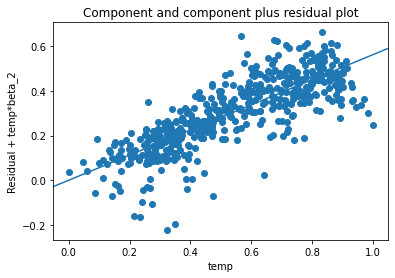

In [866]:
sm.graphics.plot_ccpr(lr8, 'temp')
plt.show()


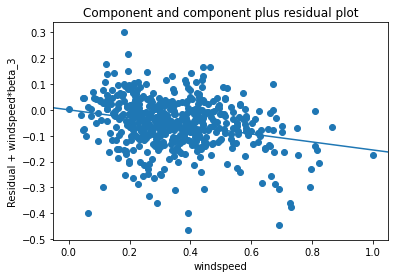

In [867]:
sm.graphics.plot_ccpr(lr8, 'windspeed')
plt.show()

Observation 25: From the above graphs we can see that the linearity model and the precitor variable is preserved.

### 5.2 Residual analysis of the train data

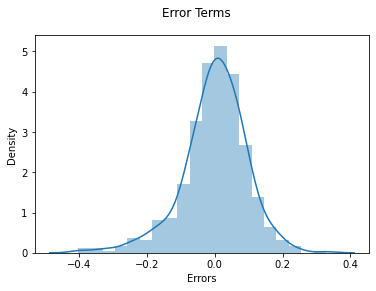

In [868]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

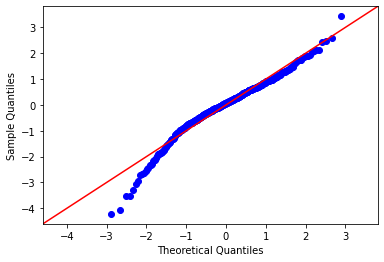

In [884]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Observation 25: We can see that the error terms are normally distributed with mean=0.

### 5.3 Independent error terms

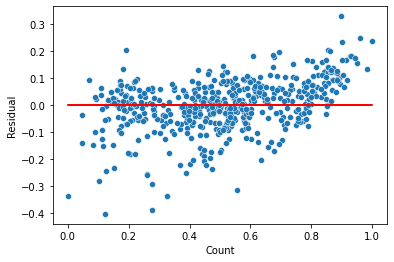

In [870]:
y_train_pred = lr8.predict(X_train_lm8)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Observation 26: From the above graph it can be seen that the error doesn't follow any pattern and hence independent of each other and is homoscedastic in nature.

### 5.4 No to minimum Multi-collinearity

In [871]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
1,temp,3.85
2,windspeed,3.43
0,yr,1.98
3,W2_Summer,1.55
7,Misty,1.48
4,W4_Winter,1.35
5,Sep,1.19
6,Light_rainsnow,1.07


Observation 26: The VIF of all the variables is below 5 and hence the multicollinearity is insignicficant. 

# Step 6: Making Predictions using final model

## 6.1 Scaling the test dataframe

In [872]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,1,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,1,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,0,1,0,0


In [873]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.527344,0.662328,0.346015,0.519816,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.150000,0.140909,0.136364,0.150000,0.122727,0.168182
std,0.501120,0.198531,0.463173,0.228967,0.214959,0.143278,0.159517,0.219880,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.357886,0.348721,0.343957,0.357886,0.328872,0.374881
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6.2 Dividing X_test and y_test

In [874]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [875]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   temp            220 non-null    float64
 3   windspeed       220 non-null    float64
 4   W2_Summer       220 non-null    uint8  
 5   W4_Winter       220 non-null    uint8  
 6   Sep             220 non-null    uint8  
 7   Light_rainsnow  220 non-null    uint8  
 8   Misty           220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.7 KB


In [876]:
# Making predictions using the final model (lr6)

y_pred = lr8.predict(X_test_lm8)

# Step 7: Model Evaluation

Text(0, 0.5, 'y_pred')

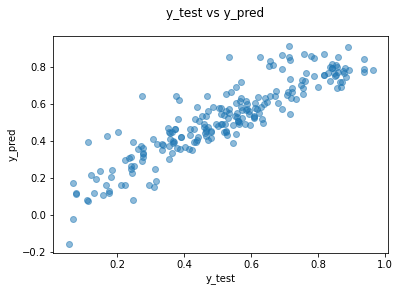

In [877]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

## 7.1 R-squared calculation on test dataframe

In [878]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8073

## 7.2 Adjusted R-squared calculation 

In [879]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8

Observation 27: The R-squared value of the train data set was 0.818 while that of test is 0.8073 which indicates that the model can generalize different datasets of the bike sharing

## Conclusions 

### The equation of the best fitted plane based on the model 8 is:

#### cnt = 0.123267 + (0.230534) yr + (0.561862) temp - (0.155457) windspeed + (0.081902) W2_Summer + (0.126486) W4_Winter + (0.096257) Sep - (0.302220) Light_rainsnow - (0.073467) Misty 

Based on the final model, the top 3 predictor variables that is signifcant in BoomBikes bike bookings are:

1. Temperature (Temp): A coefficient value of 0.561862 indicates that a temperature has significant impact on bike rentals
2. Light Rain & Snow (weathersit =3): A coefficient value of -0.302220 indicates that the light snow and rain stops people from renting the bikes which can be because they might get affected by the weather condition like rain or snow.
3. Year (yr): A coefficient value of 0.230534 indicates that there has been a substantial increase in the rentals in the subsequent year compared to the previous year.

These variables have the maximum impact on the bike bookings and hence while planning Ad-campaigns or any other promotional activity, these parameters are to be kept in mind.

It can be seen that during summers the bike rentals increase or the other way during bad to harsh weather conditions like misty, light rain or snow the sales decreases. Hence. summers are the best time for such promotional advertisments. 